In [ ]:
# Carguemos modulos y datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine learning : scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Dataset
datos = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Consumo_cerveza_SP.csv")

# Preprocesamiento de los datos

In [ ]:
# Nombres de columnas
datos.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [ ]:
# Modifiquemos los nombres de las columnas de mi dataset
datos.rename(columns = {"Temperatura Media (C)": "TemperaturaMedia",
                        "Temperatura Minima (C)":"TemperaturaMinima",
                        "Temperatura Maxima (C)":"TemperaturaMaxima",
                        "Precipitacao (mm)":"Precipitacao",
                        "Final de Semana":"FinalSemana",
                        "Consumo de cerveja (litros)": "Consumocerveja"},
             inplace = True) #modifica directamente al objeto original

In [ ]:
# Verifiquemos los nombres de las columnas
datos.columns

Index(['Data', 'TemperaturaMedia', 'TemperaturaMinima', 'TemperaturaMaxima',
       'Precipitacao', 'FinalSemana', 'Consumocerveja'],
      dtype='object')

In [ ]:
# Tipos de datos de cada columnas
datos.dtypes

Data                  object
TemperaturaMedia      object
TemperaturaMinima     object
TemperaturaMaxima     object
Precipitacao          object
FinalSemana          float64
Consumocerveja       float64
dtype: object

In [ ]:
# Observemos nuestro dataset
datos

,Data,TemperaturaMedia,TemperaturaMinima,TemperaturaMaxima,Precipitacao,FinalSemana,Consumocerveja
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Modifiquemos la coma decimal de algunas variables por un punto decimal
datos.TemperaturaMedia = datos.TemperaturaMedia.str.replace(",", ".").astype(float)
datos.TemperaturaMaxima = datos.TemperaturaMaxima.str.replace(",", ".").astype(float)
datos.TemperaturaMinima = datos.TemperaturaMinima.str.replace(",", ".").astype(float)
datos.Precipitacao = datos.Precipitacao.str.replace(",", ".").astype(float)

In [ ]:
# Verifiquemos
datos.dtypes

Data                  object
TemperaturaMedia     float64
TemperaturaMinima    float64
TemperaturaMaxima    float64
Precipitacao         float64
FinalSemana          float64
Consumocerveja       float64
dtype: object

In [ ]:
# Datos faltantes
datos.isnull().sum()

Data                 576
TemperaturaMedia     576
TemperaturaMinima    576
TemperaturaMaxima    576
Precipitacao         576
FinalSemana          576
Consumocerveja       576
dtype: int64

In [ ]:
# Eliminemos mtodos los valores faltantes
datos = datos.dropna()

In [ ]:
# Verifiquemos el numeroo de valores faltantes
datos.isnull().sum()

Data                 0
TemperaturaMedia     0
TemperaturaMinima    0
TemperaturaMaxima    0
Precipitacao         0
FinalSemana          0
Consumocerveja       0
dtype: int64

# Construccion de mi primer modelo de regresion lineal usando Sklearn

In [ ]:
# Definamos la variable dependiente y la(s) variable(s) independiente(s)
# En funcion de mi conocimiento del negocio :
# y = Consumocerveja
# X = TemperaturaMaxima, Precipitacao, FinalSemana

y = datos.Consumocerveja
X = datos[["TemperaturaMaxima", "Precipitacao", "FinalSemana"]]

In [ ]:
# Particionamiento :
  # Train : Construir el modelo == Calculo de los valores de los parametros + Algunas cositas mas
  # Test : Probar que tan bueno (o malo) es mi modelo [En funcion de alguna metrica de calidad]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [ ]:
# Construccion del modelo

# Instanciacion de la clase LinearRegression
model1 = LinearRegression()

# Ajutamos el conjunto de datos de train a model1
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Los coeficientes y el intercepto
print(model1.coef_)
print(model1.intercept_)

[ 0.69188808 -0.06550092  5.30410305]
5.904657629682113


In [ ]:
# Matematicamente
# y = 0.69188808* TemperaturaMaxima - 0.06550092*Precipitacao + 5.30410305 *FinalSemana + 5.904657629682113

In [ ]:
# Construccion de pronosticos de la variable dependiente
y_model = model1.predict(X_test)
y_model

array([30.39749559, 25.27752381, 29.16515557, 27.55410738, 19.30983857,
       29.22128585, 24.37806931, 27.22548891, 32.77970631, 17.83832353,
       20.15755203, 24.86239096, 24.3088805 , 22.34815873, 18.79793972,
       31.8962142 , 23.27104838, 23.89374765, 26.63786481, 24.51644692,
       22.16402746, 27.59064272, 30.56197658, 33.34917917, 31.61945897,
       25.208335  , 19.46566396, 31.55027017, 29.07635815, 20.19438922,
       17.46948183, 23.27104838, 25.87678793, 26.20813274, 23.13267077,
       31.2338292 , 23.03728159, 27.32975289, 25.76184546, 32.7264799 ,
       21.26826084, 28.52939778, 21.34240371, 28.46020897, 25.208335  ,
       21.40295057, 22.78017664, 31.96540301, 23.67269587, 17.9021731 ,
       18.10973952, 23.47861481, 25.41524173, 24.86239096, 26.27115664,
       26.86886639, 32.51891347, 26.17697831, 26.92199581, 26.79395317,
       23.06348196, 28.26001831, 24.72401335, 20.01917442, 30.60506201,
       24.41698469, 25.06995739, 24.51644692, 27.62994327, 27.00

In [ ]:
# Error que se cometio considerando a model1 como adecuado para los datos de testeo
errores = y_model - y_test

print("La suma de los cuadrados de los errores : %f" %(np.sum(errores**2)))

La suma de los cuadrados de los errores : 382.897829


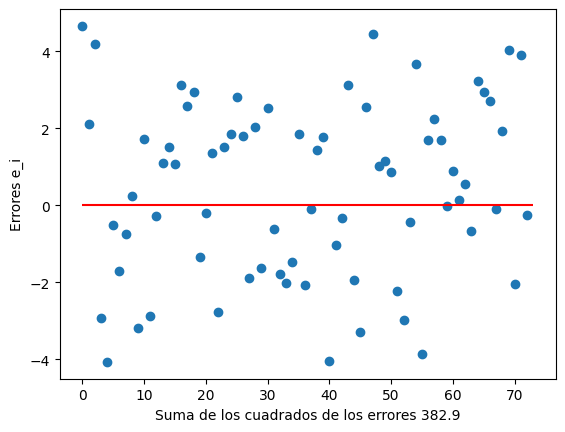

In [ ]:
# Visualicemos los errores
plt.scatter(range(0, len(errores)), errores)

# Agreguemos la recta y = 0
plt.hlines(y = 0,
           xmin = 0,
           xmax = len(errores),
           color = "red")

# Agreguemos unas etiquetas a los ejes
plt.ylabel("Errores e_i")
plt.xlabel("Suma de los cuadrados de los errores %.1f" %(np.sum(errores**2)))

plt.show()

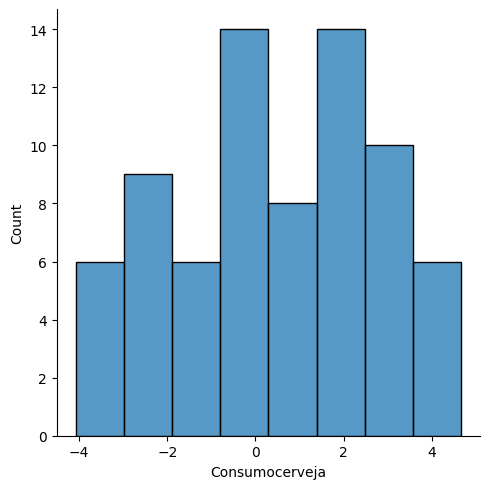

In [ ]:
# Mostremos la distribucion de los errores
sns.displot(errores)

In [ ]:
# Calculo dell R2 de model1
R2_model1 = model1.score(X_train, y_train)
R2_model1

0.7298608504151785

In [ ]:
# Calculo de un indicadore de calidad : Promedio absoluto de los errores que el modelo a cometido
MAPE_model1 = metrics.mean_absolute_percentage_error(y_test, y_model)
MAPE_model1*100

7.9749287199247645

In [ ]:
# Construyamos un segundo modelo
y = datos.Consumocerveja
X = datos[["TemperaturaMinima", "Precipitacao", "FinalSemana"]]

# Particionamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instanciar la clase LinearRegression
model2 = LinearRegression()

# Ajustar el modelo usando los datos de entrenamiento
model2.fit(X_train, y_train)

# Calculamos pronosticos
y_model2 = model2.predict(X_test)

# Calculo de R2
R2_model2 = model2.score(X_train, y_train)
print("R2 de model2 %.2f" %(R2_model2))

# Indicador de calidad
MAPE_model2 = metrics.mean_absolute_percentage_error(y_test, y_model2)
print("Indicador de calidad (MAPE) %.2f" %(MAPE_model2*100))


R2 de model2 0.51
Indicador de calidad (MAPE) 10.80


In [ ]:
# Empaquetemos la celda anterior en una funcion
def MakeModel_v1():
  y = datos.Consumocerveja
  X = datos[["TemperaturaMinima", "Precipitacao", "FinalSemana"]]

  # Particionamiento de los datos
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

  # Instanciar la clase LinearRegression
  model2 = LinearRegression()

  # Ajustar el modelo usando los datos de entrenamiento
  model2.fit(X_train, y_train)

  # Calculamos pronosticos
  y_model2 = model2.predict(X_test)

  # Calculo de R2
  R2_model2 = model2.score(X_train, y_train)
  # print("R2 de model2 %.2f" %(R2_model2))

  # Indicador de calidad
  MAPE_model2 = metrics.mean_absolute_percentage_error(y_test, y_model2)
  # print("Indicador de calidad (MAPE) %.2f" %(MAPE_model2*100))

  # Outputs
  return {"R2":R2_model2, "MAPE":MAPE_model2*100}

In [ ]:
MakeModel_v1()

{'R2': 0.5242993106464966, 'MAPE': 11.490448545028329}

In [ ]:
# Teoria de la probabilidad
# Ejecutar muchas veces (100, 1000, 10000) la funcion MakeModel_v1 obteniendo
# muchos valores para el MAPE. Considerare al promedio de todos estos MAPE
# como el MAPE del modelo

# Lista de MAPE
ListaMAPE = list()

for execution in range(10000):
  ListaMAPE.append(MakeModel_v1()["MAPE"])

MAPE_final = sum(ListaMAPE)/len(ListaMAPE)
MAPE_final

10.497451537391926